In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from scipy import optimize
from scipy.constants import e, m_e, h, pi
import matplotlib.ticker as ticker

In [24]:
data = pd.read_excel('data.xlsx')
data

,"Unak, B","Vmax, B","Vmin, B","Vpr, B",Unnamed: 4,"Unak = 2,30",Unnamed: 6,"Unak = 2,60 B",Unnamed: 8
0,2.636,1.6,7.2,11.4,NaN,"V, B","I, A","V,B","I,A"
1,2.298,1.5,6.0,13.6,NaN,0,0,0,0.08
2,NaN,NaN,NaN,NaN,NaN,0.1,0.08,0.17,0.08
3,NaN,NaN,NaN,NaN,NaN,0.204,0.08,0.426,0.09
4,NaN,NaN,NaN,NaN,NaN,0.301,0.08,0.5,0.12
...,...,...,...,...,...,...,...,...,...
67,NaN,NaN,NaN,NaN,NaN,9.55,8.62,NaN,NaN
68,NaN,NaN,NaN,NaN,NaN,9.8,9.94,NaN,NaN
69,NaN,NaN,NaN,NaN,NaN,10.6,10.76,NaN,NaN
70,NaN,NaN,NaN,NaN,NaN,11.05,12.17,NaN,NaN


In [84]:
I1 = np.array(data['Unnamed: 6'][2:], dtype=np.float64)
I2 = np.array(data['Unnamed: 8'][2:], dtype=np.float64)
U1 = data['Unak = 2,30'][2:]
U2 = data['Unak = 2,60 B'][2:]
pd.DataFrame((I1/100,I2/100),index=['I1', 'I2'])

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
I1,0.0008,0.0008,0.0008,0.0008,0.0008,0.0010,0.0016,0.0045,0.0170,0.0458,...,0.0704,0.072,0.075,0.077,0.0818,0.0862,0.0994,0.1076,0.1217,0.1416
I2,0.0008,0.0009,0.0012,0.0024,0.0073,0.0097,0.0165,0.0220,0.0571,0.0938,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
err = np.sqrt(N_Nf*100)/100

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later


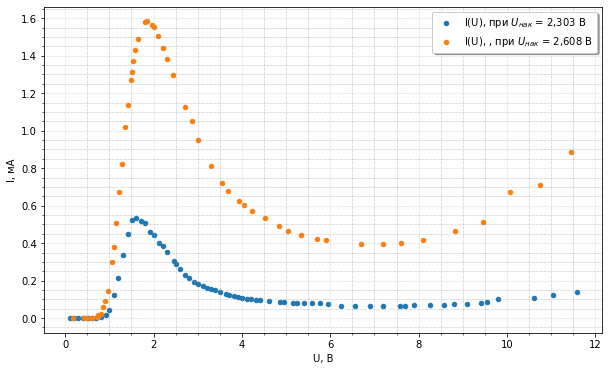

In [21]:
fig, ax = plt.subplots(figsize=(10, 6))

# ax.plot(Tcut, approx(Tcut, *beta_opt1), 'coral', lw = 2)
ax.scatter(U1, I1/100, s = 20)
ax.scatter(U2, I2/100, s = 20)
lgnd = ax.legend([r'I(U), при $U_{нак}$ = 2,303 В', r'I(U), , при $U_{нак}$ = 2,608 В'], shadow=True)


#ax.set_title(r'Число отсчетов от тока в катушке')
ax.set_xlabel(r'U, B')
ax.set_ylabel(r'I, мА')

ax.minorticks_on()

ax.grid(which='minor', color = 'gray', linestyle = ':', linewidth = 0.5)
ax.grid(which='major',linestyle = ':', linewidth = 0.5)

#plt.errorbar(I, N_Nf, yerr=err, fmt = 'ro', markersize = '1', capsize = 2, elinewidth = 1, capthick = 1, ecolor = 'blue')

plt.savefig('I(U).png', dpi=400, quality=100)
plt.show()

In [111]:
l1 = h/np.sqrt(2*m_e*(2.303*e+2.5*e))*100
l2 = h/np.sqrt(2*m_e*(2.608*e+2.5*e))*100
l3 = 108*10**(-12)
l = h*np.sqrt(5)/np.sqrt(32*m_e*(2.608-2.303)*e)
print(2*l1, 2*l2, l)



1.1192189047372922e-07 1.0852902120574697e-07 1.241413391786358e-09


In [67]:
E3 = 16*(2.3+2.5) - 2.5
E3

74.3

In [95]:
I11 = I1/100
I22 = I2/100
I11


array([0.0008, 0.0008, 0.0008, 0.0008, 0.0008, 0.001 , 0.0016, 0.0045,
       0.017 , 0.0458, 0.126 , 0.214 , 0.337 , 0.4487, 0.5249, 0.5334,
       0.5173, 0.506 , 0.4598, 0.4435, 0.399 , 0.3829, 0.3529, 0.303 ,
       0.2892, 0.2605, 0.2305, 0.2115, 0.1944, 0.182 , 0.1697, 0.1621,
       0.1544, 0.1476, 0.1395, 0.1295, 0.1243, 0.1183, 0.113 , 0.1092,
       0.1034, 0.1021, 0.098 , 0.0985, 0.0915, 0.087 , 0.0859, 0.0829,
       0.082 , 0.0808, 0.0792, 0.0781, 0.075 , 0.0652, 0.065 , 0.065 ,
       0.065 , 0.0666, 0.0673, 0.068 , 0.0704, 0.072 , 0.075 , 0.077 ,
       0.0818, 0.0862, 0.0994, 0.1076, 0.1217, 0.1416])

In [97]:
w1 = -np.log(I11)
w2 = -np.log(I22)


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later


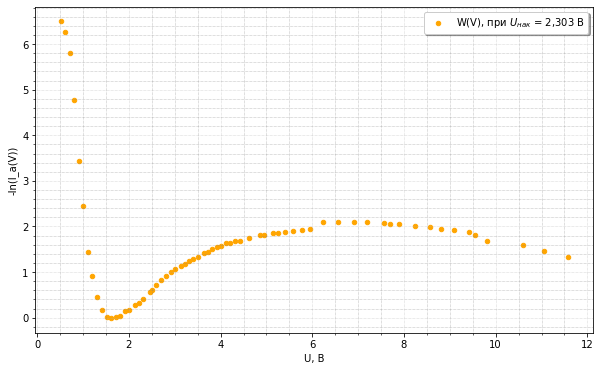

In [108]:
fig, ax = plt.subplots(figsize=(10, 6))

# ax.plot(Tcut, approx(Tcut, *beta_opt1), 'coral', lw = 2)
ax.scatter(U1[4:], w1[4:], color = 'orange', s = 20)

lgnd = ax.legend([r'W(V), при $U_{нак}$ = 2,303 В'], shadow=True)


#ax.set_title(r'Число отсчетов от тока в катушке')
ax.set_xlabel(r'U, B')
ax.set_ylabel(r'-ln(I_a(V))')

ax.minorticks_on()

ax.grid(which='minor', color = 'gray', linestyle = ':', linewidth = 0.5)
ax.grid(which='major',linestyle = ':', linewidth = 0.5)

#plt.errorbar(I, N_Nf, yerr=err, fmt = 'ro', markersize = '1', capsize = 2, elinewidth = 1, capthick = 1, ecolor = 'blue')

plt.savefig('W1.png', dpi=400, quality=100)
plt.show()

In [ ]:
T_e = np.sqrt(p_e**2 + 510**2) - 510

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later


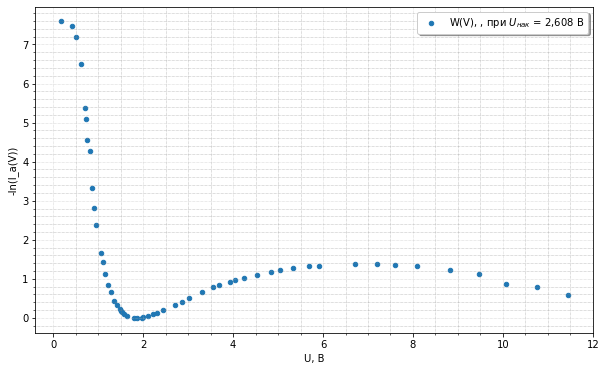

In [107]:
fig, ax = plt.subplots(figsize=(10, 6))

# ax.plot(Tcut, approx(Tcut, *beta_opt1), 'coral', lw = 2)
ax.scatter(U2, w2, s = 20)
lgnd = ax.legend([r'W(V), , при $U_{нак}$ = 2,608 В'], shadow=True)


#ax.set_title(r'Число отсчетов от тока в катушке')
ax.set_xlabel(r'U, B')
ax.set_ylabel(r'-ln(I_a(V))')

ax.minorticks_on()

ax.grid(which='minor', color = 'gray', linestyle = ':', linewidth = 0.5)
ax.grid(which='major',linestyle = ':', linewidth = 0.5)

#plt.errorbar(I, N_Nf, yerr=err, fmt = 'ro', markersize = '1', capsize = 2, elinewidth = 1, capthick = 1, ecolor = 'blue')

plt.savefig('W2.png', dpi=400, quality=100)
plt.show()

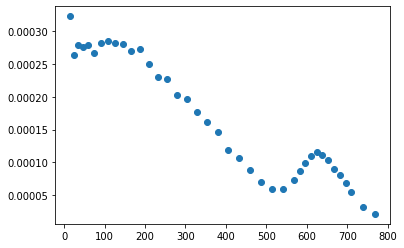

In [ ]:
Y = np.sqrt(N_Nf) / (p_e)**(3/2)

plt.scatter(T_e[3:], Y[3:])

a =  -6.307683519862769e-07
b =  0.00038110071163372644
sigma_a =  1.222463010754079e-08
sigma_b =  4.159301669258164e-06
S_e =  5.198623458217959e-06
Relative S_r a = %  1.9380538146921407
Relative S_r b = %  1.091391735121094


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:57: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later


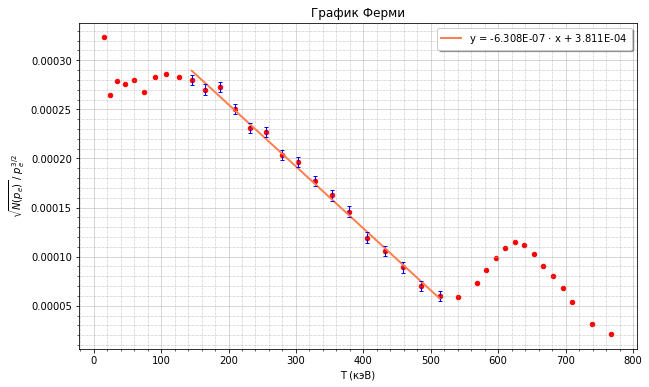

In [ ]:
T_e_fit = T_e[12:28]
Y_fit = Y[12:28]

def approx(x, a, b):
    return a * x + b
beta_opt1, beta_cov1 = curve_fit(approx, T_e_fit, Y_fit)
a = beta_opt1[0]
b = beta_opt1[1]


print('a = ', a)
print('b = ', b)



#получим погрешности для коэффициентов
sigma_a = np.sqrt(beta_cov1[0,0])
sigma_b = np.sqrt(beta_cov1[1,1])


print('sigma_a = ', sigma_a)
print('sigma_b = ', sigma_b)


residuals1 = Y_fit - approx(T_e_fit, a, b)
fres1 = sum(residuals1**2)
S_e = np.sqrt(fres1/len(T_e_fit))
print('S_e = ', S_e)


print('Relative S_r a = % ', 100* sigma_a/abs(a))
print('Relative S_r b = % ', 100* sigma_b/abs(b))



# график
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(T_e_fit, approx(T_e_fit, *beta_opt1), 'coral', lw = 2)
ax.scatter(T_e[3:], Y[3:], color = 'red', s = 20)
lgnd = ax.legend([r'y = {:.3E} $\cdot$ x + {:.3E} '.format(a,b)], loc='upper right', shadow=True)

ax.set_title(r'График Ферми')
ax.set_ylabel(r'$\sqrt{N(p_e)}\;/\;p_e^{3/2}$')
ax.set_xlabel(r'T (кэВ)')

ax.minorticks_on()

ax.grid(which='minor',
color = 'gray',
linestyle = ':', linewidth = 0.5)

ax.grid(which='major', linewidth = 0.5)
plt.errorbar(T_e_fit, Y_fit, fmt = 'ro', markersize = '1', yerr = S_e, capsize = 2, elinewidth = 1, capthick = 1, ecolor = 'blue')


plt.savefig('mkFermi.png', dpi=400, quality=100)
plt.show()

In [ ]:
E_max = -b/a
E_max

604.1848967749379

In [ ]:
E_error = np.sqrt((100* sigma_a/abs(a))**2 + (100* sigma_b/abs(b))**2)
print('%', E_error)
print(E_error/100 * E_max)

% 2.2242276205760483
13.438447353417056


In [ ]:
data_1 = data.drop(['Unnamed: 4', '№.1'	,'I, A.1'	,'Nф, 1/c',	'dN'	,'t,c',	'Unnamed: 10',	'№.2',	'I, A.2', 't, c'], axis=1)[['I, A', 'N, 1/c', 'Nф(I)', 'N-Nф, 1/c']]
data_1[r'p_e, кэВ/c'] = p_e
data_1[r'T_e, кэВ'] = T_e
data_1.insert(0, '№', range(1,len(p_e)+1))
with open('table_1.tex', 'w') as f:
    f.write(data_1.to_latex(index=False,position='H', label='t1', caption='Данные', float_format="%.3f"))

data_1

,№,"I, A","N, 1/c",Nф(I),"N-Nф, 1/c","p_e, кэВ/c","T_e, кэВ"
0,1,0.10,1.410,1.344390,0.065610,31.671875,0.982493
1,2,0.20,1.230,1.328780,-0.098780,63.343750,3.918700
2,3,0.30,1.540,1.313171,0.226829,95.015625,8.775451
3,4,0.40,1.510,1.297561,0.212439,126.687500,15.499498
4,5,0.50,1.560,1.281951,0.278049,158.359375,24.020310
5,6,0.60,1.799,1.266341,0.532659,190.031250,34.253503
6,7,0.70,2.079,1.250732,0.828268,221.703125,46.104555
7,8,0.80,2.509,1.235122,1.273878,253.375000,59.472467
8,9,0.90,2.879,1.219512,1.659488,285.046875,74.253131
9,10,1.00,3.749,1.203902,2.545098,316.718750,90.342208
